# Import Dependentias

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


# get the dataset

In [40]:
sms = pd.read_csv("spam.csv",encoding='latin-1')
sms = sms.rename(columns = {'v1': 'label', 'v2': 'message'}, inplace = False)
sms.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
sms= sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
sms.shape


(5572, 2)

In [43]:
sms.drop_duplicates(inplace=True)

In [44]:
sms.reset_index(drop=True, inplace=True)

In [45]:
sms.shape

(5169, 2)

In [46]:
sms['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

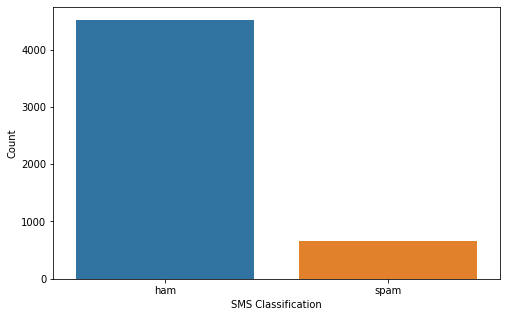

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

# Cleaning the messages

In [48]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages
    

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [72]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Extracting dependent variable from the dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9806576402321083


# navie_bays

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print("Accuracy ",mnb.score(X_test, y_test))

Accuracy  0.9816247582205029


# SVM

In [57]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)
print("Accuracy ",clf.score(X_test, y_test))

Accuracy  0.9806576402321083


# predict the message

In [58]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return mnb.predict(temp)


In [59]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [60]:

msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [61]:
msg = "hello raghavendra"

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [74]:
from tkinter import *
#Create an instance of Tkinter frame or window
root= Tk()
#Set the geometry of tkinter frame
root.geometry("800x500")
def mydelete():
        myLabel.destroy()
        checkbutton['state']=NORMAL
        entry.delete(0, END)
        
        
def callback():
        global myLabel,msg
        msg=entry.get()
        if predict_spam(msg):
            myLabel=Label(root, text="Wait a minute, this is a SPAM!",fg="red" ,font=('helvetica 20 bold'))
            myLabel.pack(pady=4)
            
        else:
            
            myLabel=Label(root, text="This is a normal message.", fg="green",font=('helvetica 20 bold'))
            myLabel.pack(pady=4)
            
        checkbutton['state']=DISABLED
            



title=Label(root, text="PHISHING MESSAGE DETECTOR", font=('helvetica 20 bold'))
title.pack(pady=4)
entry=Entry(root,width=60)
entry.pack(ipadx=15,ipady=5)

checkbutton=Button(root,text="check message",bg="blue",fg="white",font=(10),command=callback)
checkbutton.pack(pady=10)

clearButton=Button(root,text="clear",bg="red",fg="white",font=(10),command=mydelete)
clearButton.pack(pady=10)

root.mainloop()